In [1]:
%matplotlib inline
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
from pandasql import sqldf
from __future__ import division
import datetime as dt
import numpy as np
pysqldf = lambda q: sqldf(q, globals())

pd.set_option('display.mpl_style', 'default')

/Users/acandela/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
test = pd.read_csv('test_table.csv',sep=',',header=0)
user = pd.read_csv('user_table.csv',sep=',',header=0)

test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d')
df=pd.merge(test,user,how='inner',on='user_id')
df['intercept']=1.0

In [4]:
print pd.crosstab(df['test'],df['country'])

country  Argentina  Bolivia  Chile  Colombia  Costa Rica  Ecuador  \
test                                                                
0             9356     5550   9853     27088        2660     8036   
1            37377     5574   9884     26972        2649     7859   

country  El Salvador  Guatemala  Honduras  Mexico  Nicaragua  Panama  \
test                                                                   
0               4108       7622      4361   64209       3419    1966   
1               4067       7503      4207   64275       3304    1985   

country  Paraguay   Peru  Spain  Uruguay  Venezuela  
test                                                 
0            3650  16869  51782      415      16149  
1            3697  16797      0     3719      15905  


In [4]:
country_df=df[['conversion','test','intercept']][df['country']=='Mexico']

In [11]:
country_df.head()

,conversion,test,intercept
1,0,1,1.0
3,0,1,1.0
4,0,1,1.0
6,0,0,1.0
9,0,0,1.0


In [5]:
logit=sm.Logit(country_df['conversion'],country_df[['test','intercept']])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.199510
         Iterations 7


In [8]:
#print result.summary()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:               128484
Model:                          Logit   Df Residuals:                   128482
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 Nov 2016   Pseudo R-squ.:               3.751e-05
Time:                        11:41:39   Log-Likelihood:                -25634.
converged:                       True   LL-Null:                       -25635.
                                        LLR p-value:                    0.1655
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
test           0.0354      0.026      1.387      0.166        -0.015     0.085
intercept     -2.9551      0.018   -162.417      0.000        -2.991    -2.919
==============================================================================
"""

In [5]:
pd.crosstab(country_df['conversion'],country_df['test'])

test,0,1
conversion,,
0,61031,60985
1,3178,3290


In [7]:
#find estimated probability for test
t_sum=60985 + 3290
c_sum=3178 + 61031
p_test = 3290/t_sum
p_control = 
print('test_probability = {}'.format())
print('control_probability = {}'.format(3178/c_sum))

test_probability = 0.0511863088292
control_probability = 0.0494946191344


In [12]:
x = np.exp(0.0354 - 2.9551)
x = np.exp(-2.9551)
prob= x/(1+x)
print ('prob = {}'.format(prob))
print('x = {}'.format(x))

prob = 0.0494960240877
x = 0.0520734529703


In [6]:
country_df=df[df['country']=='Argentina']

In [9]:
country_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,intercept
31,730926,2015-11-30,Ads,Web,ES,Facebook,IE,0,0,F,26,Argentina,1.0
49,310570,2015-12-01,SEO,Web,ES,NaN,Safari,0,1,M,31,Argentina,1.0
57,216139,2015-12-01,Direct,Web,ES,NaN,IE,0,1,F,25,Argentina,1.0
58,312280,2015-12-03,SEO,Web,EN,NaN,Safari,0,0,M,39,Argentina,1.0
73,812673,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,33,Argentina,1.0


In [10]:
country_df['control']=[(i + 1) % 2 for i in country_df['test'] ]

/Users/acandela/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
country_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,intercept,control
31,730926,2015-11-30,Ads,Web,ES,Facebook,IE,0,0,F,26,Argentina,1.0,1
49,310570,2015-12-01,SEO,Web,ES,NaN,Safari,0,1,M,31,Argentina,1.0,0
57,216139,2015-12-01,Direct,Web,ES,NaN,IE,0,1,F,25,Argentina,1.0,0
58,312280,2015-12-03,SEO,Web,EN,NaN,Safari,0,0,M,39,Argentina,1.0,1
73,812673,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,33,Argentina,1.0,0


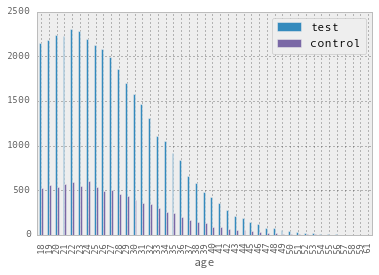

In [26]:
country_df.groupby(['age']).sum()[['test','control']].plot(kind='bar')